In [2]:
#Get stats on housing data and timelapse images
import os
import pickle

borrough='new'
#borrough=''

if borrough=='':
   f=open('/imagenetdb/tgebru/scrape/lat_lng_rot_url.txt','rb')
else:
   f=open('/imagenetdb/tgebru/scrape/%s_lat_lng_rot_url.txt'%borrough,'rb')
lines= f.readlines()
i=0
num_lines=len(lines)
num_tot_ims=0
num_real_ims=0
lat_lng_date_dict={}
lat_lng_rot_date_dict={}
lat_lng_rot_date_file_dict={}
#MIN_SIZE=100e3
MIN_SIZE=50e3
num_lines=len(lines)
line_i=0

#Save files of loaded images

f_loaded=open('/afs/cs.stanford.edu/u/tgebru/cvpr2016/%s_loaded_lat_lng_rot_url.txt'%borrough,'w')
f_unloaded=open('/afs/cs.stanford.edu/u/tgebru/cvpr2016/%s_unloaded_lat_lng_rot_url.txt'%borrough,'w')
for l in lines:
    line_i += 1
    if num_lines % line_i ==10000:
        print 'processing line %d out of %d'%(line_i,num_lines)
    parts=l.split('\t')
    fname=parts[-1].strip()#.replace('gsv_time_fixed','gsv_time_fixed_unwarp')
    png_fname=fname.replace('jpg','png')
    if os.path.exists(png_fname) and not os.path.exists(fname):
        fname=png_fname
    if os.path.exists(fname):
        num_tot_ims += 1
        #Only add the images to the dict if they are totally loaded
        if os.stat(fname).st_size>(MIN_SIZE):
            num_real_ims += 1
            #Save the URLS of the loaded images for visualization
            f_loaded.write(l)
            lat=parts[0].split('_')[0].strip()
            lng=parts[0].split('_')[1].strip()
            rot=parts[0].split('_')[2].strip()
            date_str=parts[-1].split('_')[-1][:-5]
            
            #lat_lng_date dict
            if '%s_%s'%(lat,lng) not in lat_lng_date_dict:
                lat_lng_date_dict['%s_%s'%(lat,lng)]={}
                lat_lng_date_dict['%s_%s'%(lat,lng)][date_str]=1
            elif date_str not in lat_lng_date_dict['%s_%s'%(lat,lng)]:
                lat_lng_date_dict['%s_%s'%(lat,lng)][date_str] =1
            else:
                lat_lng_date_dict['%s_%s'%(lat,lng)][date_str] += 1
                
            #lat_lng_rot_date dict
            if '%s_%s_%s'%(lat,lng,rot) not in lat_lng_rot_date_dict:
                lat_lng_rot_date_dict['%s_%s_%s'%(lat,lng,rot)]=[date_str]
            else:
                 lat_lng_rot_date_dict['%s_%s_%s'%(lat,lng,rot)].append(date_str)
            lat_lng_rot_date_file_dict['%s_%s_%s_%s'%(lat,lng,rot,date_str)]=fname
        else:
          f_unloaded.write(l)
  
    else:
        f_unloaded.write(l)
f.close()
f_loaded.close()
f_unloaded.close()
with open('%s_lat_lng_rot_date_dict.pickle'%borrough,'wb') as f:
    pickle.dump(lat_lng_rot_date_dict,f)
    
with open('%s_lat_lng_rot_date_file_dict.pickle'%borrough,'wb') as f:
    pickle.dump(lat_lng_rot_date_file_dict,f)
    
with open('%s_lat_lng_date_dict.pickle'%borrough,'wb') as f:
    pickle.dump(lat_lng_date_dict,f)

processing line 25979 out of 269790
processing line 51958 out of 269790
processing line 129895 out of 269790
processing line 259790 out of 269790


In [3]:
#1. Number of total locations with non zero images
print len(lat_lng_date_dict.keys()) 

5090


In [4]:
#2. Number of total images, number of loaded images
print num_tot_ims, num_real_ims

269790 116421


In [4]:
#3. Average number of dates per location
num_dates =0
for key1 in lat_lng_date_dict.keys():
    num_dates += len(lat_lng_date_dict[key1].keys())
print float(num_dates)/float(len(lat_lng_date_dict.keys()))
            

4.24385859796


In [5]:
#4. Average number of images per location
float(num_real_ims)/float(len(lat_lng_date_dict.keys()))

15.121429998002796

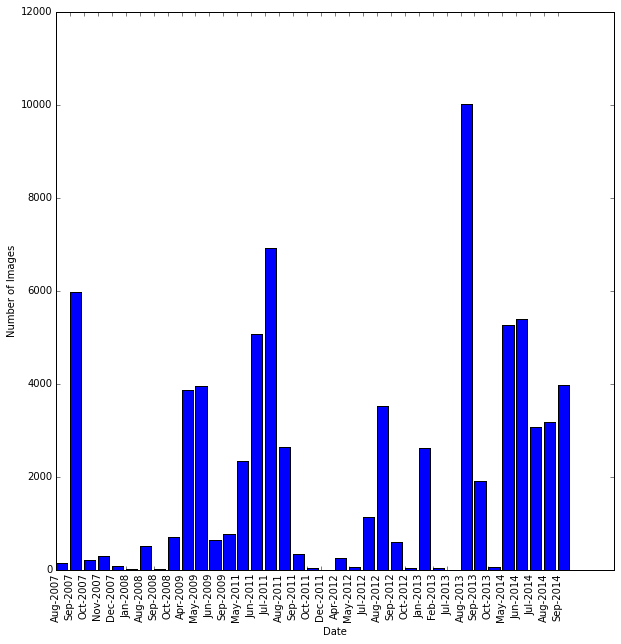

In [6]:
#5. Number of images per date
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,10)

date_dict={}
for key1 in lat_lng_date_dict.keys():
   for date in lat_lng_date_dict[key1].keys():
     if date in date_dict.keys():
         date_dict[date] += lat_lng_date_dict[key1][date]
     else:
         date_dict[date]=lat_lng_date_dict[key1][date]
#Plot results
date_list=[datetime.strptime(k,'%b-%Y') for k in date_dict.keys()] 
date_list.sort()
date_list_str=[d.strftime('%b-%Y') for d in date_list]
date_list_ims=[date_dict[k] for k in date_list_str]
fig,ax=plt.subplots()
rects1 = ax.bar(xrange(len(date_list_str)),date_list_ims)
plt.ylabel('Number of Images')
plt.xlabel('Date')
plt.xticks(xrange(len(date_list_str)), date_list_str, 
          rotation='vertical')
plt.show() 

{'2007': 38977, '2014': 16450, '2008': 230, '2009': 6941, '2011': 42379, '2010': 17, '2013': 43892, '2012': 16374}
165260 165260


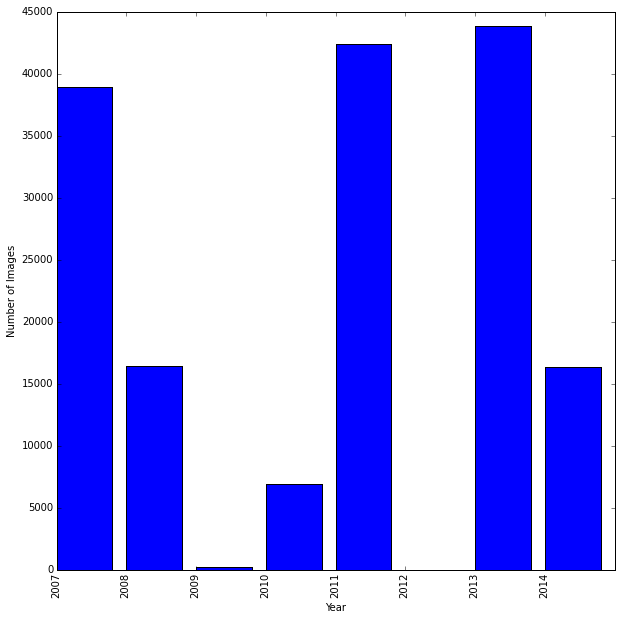

In [7]:
#6. Number of images per year
year_ims_dict={}
for date,ims in zip(date_list_str,date_list_ims):
    year=date.split('-')[-1]
    if year in year_ims_dict:
        year_ims_dict[year] += ims
    else:
        year_ims_dict[year] = ims
#Plot results
years=sorted(year_ims_dict.keys())
num_ims=[year_ims_dict[y] for y in year_ims_dict.keys()]
fig,ax=plt.subplots()
rects1 = ax.bar(xrange(len(years)),num_ims)
plt.ylabel('Number of Images')
plt.xlabel('Year')
plt.xticks(xrange(len(years)), years, 
          rotation='vertical')
print year_ims_dict

#Make sure images add up to num_real_ims
print num_real_ims,sum(year_ims_dict.values())

{'2007': 38977, '2014': 16450, '2008': 230, '2009': 6941, '2011': 42379, '2010': 17, '2013': 43892, '2012': 16374}
{'2007': 6250, '2014': 2927, '2008': 47, '2009': 1193, '2011': 7175, '2010': 3, '2013': 6169, '2012': 2885}


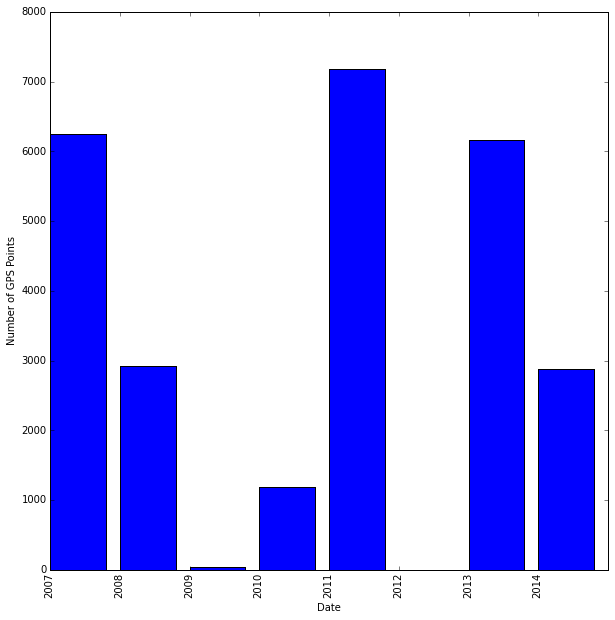

In [8]:
#7. Number of lat/longs per year
year_locs_dict={}

for key1 in lat_lng_date_dict.keys():
    dates=lat_lng_date_dict[key1].keys()
    years=[d.split('-')[-1] for d in dates]
    years=set(years)
    for year in years:
        if year in year_locs_dict:
            year_locs_dict[year] += 1
        else:
            year_locs_dict[year] = 1
            
#Plot results
years=sorted(year_locs_dict.keys())
num_locs=[year_locs_dict[y] for y in year_locs_dict.keys()]
fig,ax=plt.subplots()
rects1 = ax.bar(xrange(len(years)),num_locs)
plt.ylabel('Number of GPS Points')
plt.xlabel('Date')
plt.xticks(xrange(len(years)), years, 
          rotation='vertical')
print year_ims_dict
print year_locs_dict

In [9]:
#Number of independent pairs of images (different times)
#Make dict with lat_lng_rot key & date pairs as values
import itertools
lat_lng_rot_pairs_dict={}
num_pairs=0
for key in lat_lng_rot_date_dict.keys():
    dates=[datetime.strptime(d,'%b-%Y') for d in lat_lng_rot_date_dict[key]] 
    dates.sort()
    sorted_dates=[d.strftime('%b-%Y') for d in dates]
    pairs = list(itertools.combinations(sorted_dates,2))
    lat_lng_rot_pairs_dict[key]=pairs
    num_pairs += len(pairs)
print num_pairs

209444


{0: 17468, 1: 35144, 2: 46216, 3: 14120, 4: 37134, 5: 11915, 6: 33853, 7: 13594}


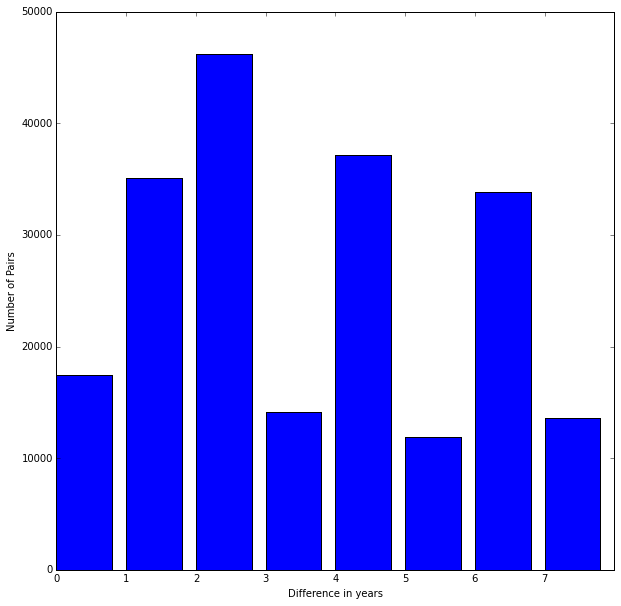

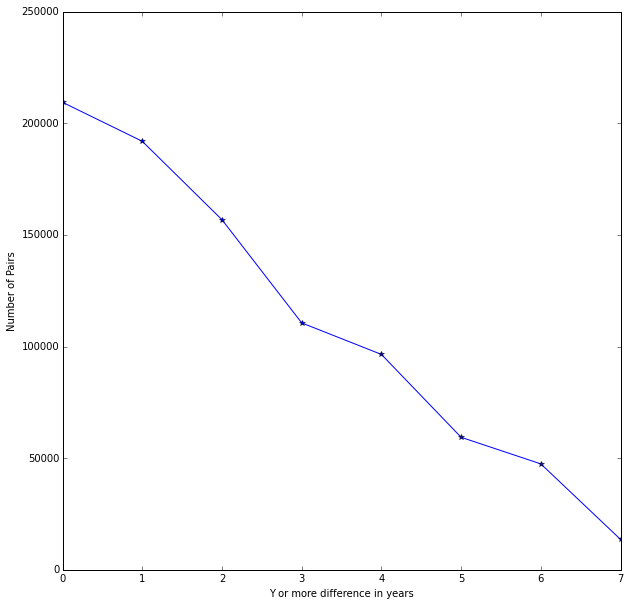

In [10]:
#9. Number of pairs with x years difference between them (x=0-8)
import numpy as np
year_pair_dict={}
for key in lat_lng_rot_pairs_dict.keys():
    pairs=lat_lng_rot_pairs_dict[key]
    for p in pairs:
        diff=int(p[1].split('-')[-1])-int(p[0].split('-')[-1])
        if diff not in year_pair_dict:
            year_pair_dict[diff]=1
        else:
            year_pair_dict[diff] += 1
print year_pair_dict

#Plot results
diffs=sorted(year_pair_dict.keys())
num_pairs=[year_pair_dict[y] for y in year_pair_dict.keys()]
fig,ax=plt.subplots()
rects1 = ax.bar(xrange(len(diffs)),num_pairs)
plt.ylabel('Number of Pairs')
plt.xlabel('Difference in years')
plt.xticks(xrange(len(diffs)), diffs, 
          rotation='horizontal')
plt.show()

# calculate the proportional values of samples
cum_pairs=[]
for i in xrange(len(num_pairs)):
    cum_pairs.insert(i,sum(num_pairs[i:]))
fig,ax=plt.subplots()
ax.plot(cum_pairs,'b-*') 
plt.xticks(xrange(len(cum_pairs)),diffs,
          rotation='horizontal')
plt.ylabel('Number of Pairs')
plt.xlabel('Y or more difference in years')
plt.show()

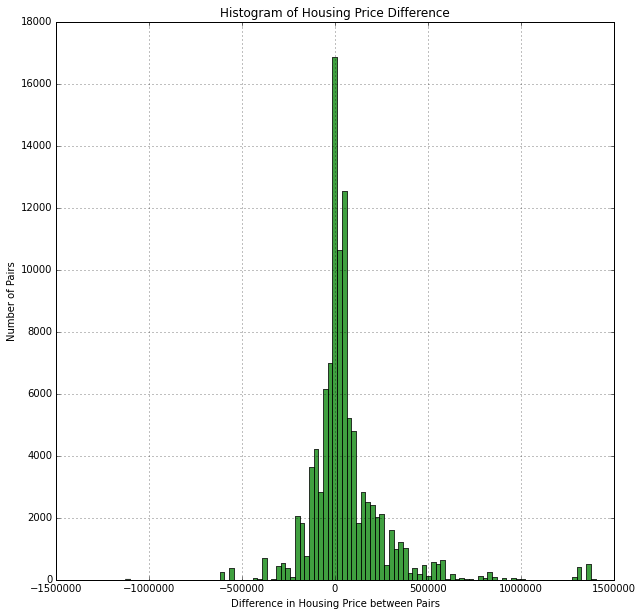

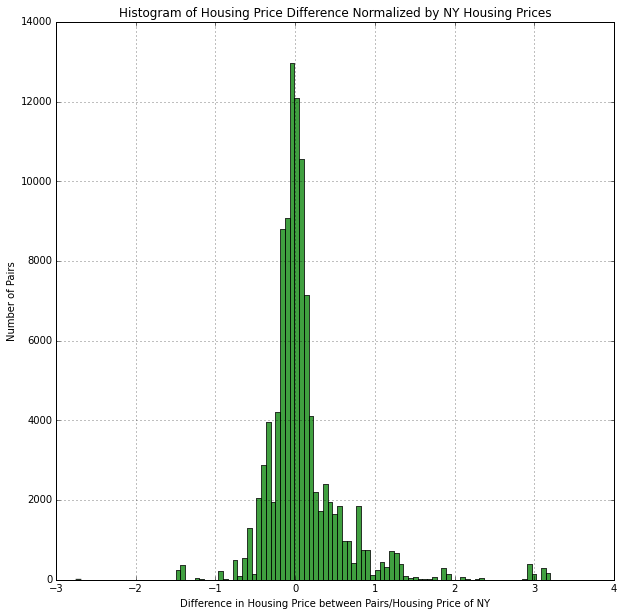

In [11]:
#10. Number of pairs with $$ separation 
#Get housing delta for each date pair in lat_lng_rot_pairs_dict
load_dir='/imagenetdb3/tgebru/cvpr2016/housing_data/'
with open(os.path.join(load_dir,'ny_housing_dict.pickle'),'rb') as f:
    ny_housing_dict=pickle.load(f)

with open(os.path.join(load_dir,'housing_dict.pickle'),'rb') as f:
    housing_dict=pickle.load(f)

with open(os.path.join(load_dir,'zipcode_dict.pickle'),'rb') as f:
    zipcode_dict=pickle.load(f)

#import zipcode dict pickle file
lat_lng_rot_housing_dict={}
norm_lat_lng_rot_housing_dict={}

diffs=[]
norm_diffs=[]
for key in lat_lng_rot_pairs_dict:
    zipcode=str(zipcode_dict['%s_%s'%(key.split('_')[0],key.split('_')[1])])
    pairs=lat_lng_rot_pairs_dict[key]
    house_pairs=[]
    norm_house_pairs=[]
    if zipcode !='None':
        if zipcode in housing_dict:
            for p in pairs:
                if p[0] in housing_dict[zipcode] and \
                  p[1] in housing_dict[zipcode]:
                    price1=housing_dict[zipcode][p[1]]
                    price0=housing_dict[zipcode][p[0]]
                    ny_price1=ny_housing_dict[p[1]]
                    ny_price0=ny_housing_dict[p[0]]

                    if price1.strip() and price0.strip():
                        delta=float(price1)-float(price0)
                        diffs.append(delta)
                        norm_delta=(float(price1)/float(ny_price1))-\
                                (float(price0)/float(ny_price0))
                        norm_diffs.append(norm_delta)
                    else:
                        delta=-1
                        norm_delta=-1
                    house_pairs.append(delta)
                    norm_house_pairs.append(norm_delta)
                else:
                    house_pairs.append(-1)
                    norm_house_pairs.append(-1)
    lat_lng_rot_housing_dict[key]=house_pairs
    norm_lat_lng_rot_housing_dict[key]=norm_house_pairs

    
#Plot Histogram of unnormalized housing prices
fig,ax=plt.subplots()
n,bins,patches=plt.hist(diffs,100,normed=0,facecolor='g',alpha=0.75)
plt.xlabel('Difference in Housing Price between Pairs')
plt.ylabel('Number of Pairs')
plt.title('Histogram of Housing Price Difference')
plt.grid(True)
plt.show()

#Plot Histogram of normalized housing prices
fig,ax=plt.subplots()
n,bins,patches=plt.hist(norm_diffs,100,normed=0,facecolor='g',alpha=0.75)
plt.xlabel('Difference in Housing Price between Pairs/Housing Price of NY')
plt.ylabel('Number of Pairs')
plt.title('Histogram of Housing Price Difference Normalized by NY Housing Prices')
plt.grid(True)
plt.show()

with open('lat_lng_rot_pairs_dict.pickle','wb') as f:
    pickle.dump(lat_lng_rot_pairs_dict,f)


AttributeError: 'module' object has no attribute 'aranage'

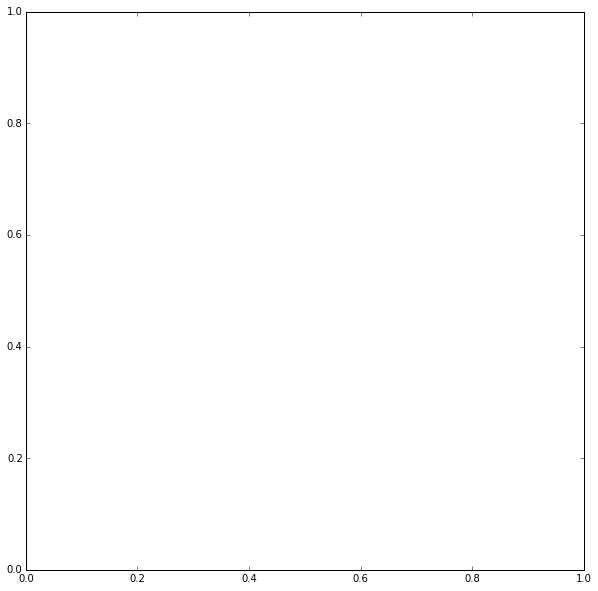

In [12]:
#11. 1-CDF of pairs with $$ separation 
#($$ between 0 and max housing price difference) 
import numpy as np

abs_diffs=[abs(d) for d in diffs]
abs_norm_diffs=[abs(d) for d in norm_diffs]
sorted_diffs=sorted(abs_diffs)
sorted_norm_diffs=sorted(abs_norm_diffs)

fig,ax=plt.subplots()
ax.plot(abs_diffs,np.aranage(len(abs_diffs),1,1),'b-*') 
plt.xlabel('X or more Husing Price Difference')
plt.ylabel('# of pairs')
plt.title('1-CDF of pairs with housing price difference')
plt.show()

fig,ax=plt.subplots()
ax.plot(abs_norm_diffs,np.arange(len(abs_norm_diffs),1,1),'b-*') 
plt.xlabel('X or more Housing Price Difference')
plt.ylabel('# of pairs')
plt.title('1-CDF of pairs with normalized housing price difference')
plt.show()

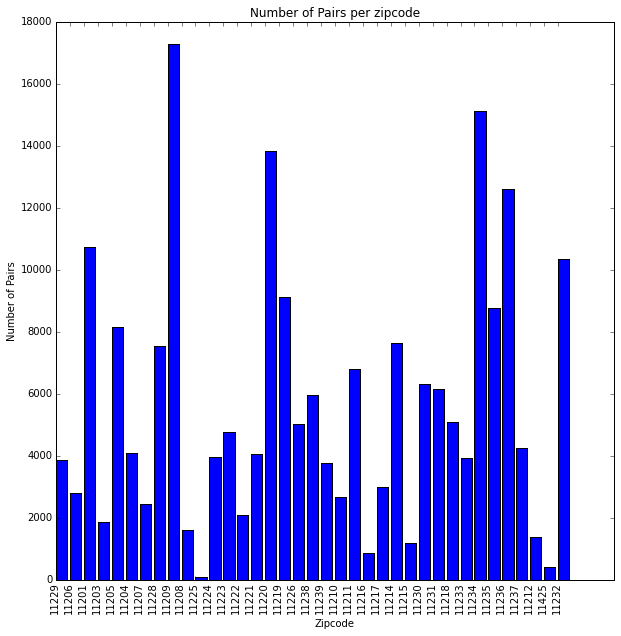

37


In [13]:
#12. Number of Pairs per zipcode
zipcode_pairs_dict={}

for key in lat_lng_rot_pairs_dict.keys():
    zipcode=str(zipcode_dict['%s_%s'%(key.split('_')[0],key.split('_')[1])])
    if zipcode not in zipcode_pairs_dict:
        zipcode_pairs_dict[zipcode]=len(lat_lng_rot_pairs_dict[key])
    else:
        zipcode_pairs_dict[zipcode] += len(lat_lng_rot_pairs_dict[key])

#Make bar plot
zipcodes=zipcode_pairs_dict.keys()
pairs=[zipcode_pairs_dict[z] for z in zipcodes]
fig,ax=plt.subplots()
rects1 = ax.bar(xrange(len(zipcodes)),pairs)
plt.xticks(xrange(len(zipcodes)), zipcodes, 
          rotation='vertical')
plt.xlabel('Zipcode')
plt.ylabel('Number of Pairs')
plt.title('Number of Pairs per zipcode')
plt.show()
print len(zipcodes)

with open('zipcode_pairs_dict.pickle','wb') as f:
    pickle.dump(zipcode_pairs_dict,f)

In [17]:
#13. Number of images per zipcode


NameError: name 'lat_lng_rot_zip_date_price' is not defined

In [14]:
sorted_pairs=sorted(pairs)
print sorted_pairs[44]

IndexError: list index out of range

In [15]:
#Helper function to get images from lat,lng,rot,date 
def lat_lng_to_path(lat,lng,rot,date):
  '''Converts latitude and longitude into a folder to save images in.'''
  base_dir='/imagenetdb3/data/geo/gsv_time_fixed/'
  lat_base = lat.split('.')[0]
  lng_base = lng.split('.')[0]
  subfolder1 = '%s_%s' % (lat_base, lng_base)
  lat_dec = lat.split('.')[1]
  lng_dec = lng.split('.')[1]
  subfolder2 = '%s_%s' % (lat_dec[0], lng_dec[0])
  subfolder3 = '%s_%s' % (lat_dec[1], lng_dec[1])
  subfolder4 = '%s_%s' % (lat_dec[2], lng_dec[2])
  pitch=0
  im_name = '%s_%s_%s_%s.jpg'%(lat, lng, rot,date)
  return os.path.join(base_dir, subfolder1, subfolder2, subfolder3, subfolder4,im_name)

In [16]:
#print lat_lng_rot_zip_2013_price['40.544995_-74.190401_120'] 
i=0
no_exist=[]
for key in lat_lng_rot_date_dict.keys():#lat_lng_rot_zip_2013_price.keys():
    #date=lat_lng_rot_zip_2013_price[key]['date']
    for date in lat_lng_rot_date_dict[key]:
        i+=1
        if i % 10000==0:print i
        fname=lat_lng_to_path(key.split('_')[0],
                          key.split('_')[1],
                          key.split('_')[2],
                          date)
        if not os.path.exists(fname):
           no_exist.append(fname)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000


In [17]:
print no_exist[0]

/imagenetdb3/data/geo/gsv_time_fixed/40_-73/6_9/9_3/6_0/40.696077_-73.930973_180_Sep-2011.jpg


In [18]:
#If the save path isn't equal to the lat_lng_rot_date,print the line, 
f=open('/afs/cs.stanford.edu/u/tgebru/cvpr2016/lat_lng_rot_url.txt','rb')
fout=open('/afs/cs.stanford.edu/u/tgebru/cvpr2016/fixed_lat_lng_rot_url.txt','w')
lines= f.readlines()
num_wrong=0
wrong_lines=[]
i_l=0
for l in lines:
   if i_l % 10000 ==0:
     print 'Processing line %d'%i_l
   i_l += 1
   parts=l.split('\t')
   lat=parts[0].split('_')[0].strip()
   lng=parts[0].split('_')[1].strip()
   rot=parts[0].split('_')[2].strip()
   date_str=parts[-1].split('_')[-1][:-5] 
   fname=lat_lng_to_path(lat,lng,rot,date_str)
   cur_fname=parts[-1].strip()
   if fname != cur_fname:
     num_wrong += 1
     parts[-1]=cur_fname
     parts.append(fname)
     new_line='\t'.join(parts)
     wrong_lines.append(new_line)

for l in wrong_lines:
    fout.write('%s\n'%l)
f.close()
fout.close()

Processing line 0
Processing line 10000
Processing line 20000
Processing line 30000
Processing line 40000
Processing line 50000
Processing line 60000
Processing line 70000
Processing line 80000
Processing line 90000
Processing line 100000
Processing line 110000
Processing line 120000
Processing line 130000
Processing line 140000
Processing line 150000
Processing line 160000
Processing line 170000
Processing line 180000
Processing line 190000
Processing line 200000
Processing line 210000
Processing line 220000
Processing line 230000
Processing line 240000
Processing line 250000
Processing line 260000
Processing line 270000
Processing line 280000
Processing line 290000
Processing line 300000
Processing line 310000
Processing line 320000
Processing line 330000
Processing line 340000
Processing line 350000
Processing line 360000
Processing line 370000
Processing line 380000
Processing line 390000
Processing line 400000
Processing line 410000
Processing line 420000
Processing line 430000
Pr

In [19]:
print wrong_lines[0].split('\t')[-2]
print wrong_lines[0].split('\t')[-1]

/imagenetdb3/data/geo/gsv_time_fixed/40_-74/4_2/9_4/8_5/40.498681_-74.244955_0_Aug-2007.jpg
/imagenetdb3/data/geo/gsv_time_fixed/40_-74/4_2/9_4/8_4/40.498681_-74.244955_0_Aug-2007.jpg


In [5]:
#Create zipcode-->borrough dict    
zipcodes=list(set(zipcode_dict.values()))
zip_county_fname='/imagenetdb3/tgebru/cvpr2016/housing_data/geo_data/ny_zipcode_county.txt'
zip_county_lines=open(zip_county_fname,'rb').readlines()
zip_borrough_dict = {int(z):0 for z in zipcodes if z is not None}
for l in zip_county_lines:
    zip_borrough_dict[int(l.split('\t')[0])] = l.split('\t')[1].strip().lower()

#Save zip_borrough dict
with open('/imagenetdb3/tgebru/cvpr2016/housing_data/zipcode_borrough_dict.pickle', 'w') as f:
  pickle.dump(zip_borrough_dict,f)

NameError: name 'zipcode_dict' is not defined